In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
%matplotlib inline


In [2]:
cd

C:\Users\Admin


In [3]:
cd Desktop/

C:\Users\Admin\Desktop


In [4]:
cd Lekan/

C:\Users\Admin\Desktop\Lekan


In [5]:
cd Tech/

C:\Users\Admin\Desktop\Lekan\Tech


In [6]:
cd daily-bike-share.txt

[WinError 267] The directory name is invalid: 'daily-bike-share.txt'
C:\Users\Admin\Desktop\Lekan\Tech


In [7]:
bike=pd.read_csv('daily-bike-share.txt')
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364


In [8]:
bike['day']=pd.DatetimeIndex(bike['dteday']).day
num_features=['temp','atemp','hum','windspeed']
categ_features=['season','yr','mnth','holiday','weekday','workingday','weathersit','day']
bike[num_features + ['rentals']].describe()
label=bike['rentals']

#performing regression,test,train & fit
x,y=bike[['season','yr','mnth','holiday','weekday','workingday','weathersit','day','temp','atemp','hum','windspeed']].values,label
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)
print('Training values:',(x_train.shape[0]),'\n\nTesting Values:',(x_test.shape[0]))
bike.head(5)

Training values: 511 

Testing Values: 220


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5


####  Lasso Algorithm: linear regression

MSE: 170132.4727009465 

RMSE: 412.47117802453363 

R2: 0.6664659654035177


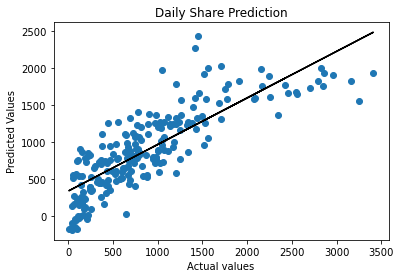

In [9]:
from sklearn.linear_model import Lasso
model=Lasso().fit(x_train,y_train)
model
'''Lasso model'''

pred=model.predict(x_test)
mse=mean_squared_error(y_test,pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,pred)
print('MSE:',mse,'\n\nRMSE:',rmse,'\n\nR2:',r2)

#plot predicted vs actual
plt.scatter(y_test,pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')
plt.title('Daily Share Prediction')

#plot the regression line
z=np.polyfit(y_test,pred,1)
p=np.poly1d(z)
plt.plot(y_test,p(y_test),color='k')

####  Decision Tree Algorithm

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

#Train model
model=DecisionTreeRegressor().fit(x_train,y_train)

#visualize the model tree
tree=export_text(model)
print(tree)

|--- feature_8 <= 0.45
|   |--- feature_5 <= 0.50
|   |   |--- feature_9 <= 0.32
|   |   |   |--- feature_10 <= 0.41
|   |   |   |   |--- feature_2 <= 2.50
|   |   |   |   |   |--- feature_9 <= 0.26
|   |   |   |   |   |   |--- value: [317.00]
|   |   |   |   |   |--- feature_9 >  0.26
|   |   |   |   |   |   |--- feature_9 <= 0.27
|   |   |   |   |   |   |   |--- value: [515.00]
|   |   |   |   |   |   |--- feature_9 >  0.27
|   |   |   |   |   |   |   |--- value: [558.00]
|   |   |   |   |--- feature_2 >  2.50
|   |   |   |   |   |--- feature_10 <= 0.40
|   |   |   |   |   |   |--- feature_11 <= 0.22
|   |   |   |   |   |   |   |--- value: [981.00]
|   |   |   |   |   |   |--- feature_11 >  0.22
|   |   |   |   |   |   |   |--- value: [968.00]
|   |   |   |   |   |--- feature_10 >  0.40
|   |   |   |   |   |   |--- feature_11 <= 0.36
|   |   |   |   |   |   |   |--- value: [710.00]
|   |   |   |   |   |   |--- feature_11 >  0.36
|   |   |   |   |   |   |   |--- value: [532.00]
|   | 

######  Evaluating the model

RMS: 236735.43636363637 

RMSE: 486.55465917370105 

R2: 0.5358950353874263 


Slope: 0.7566891381751132 
Intercept: 231.51249098893794


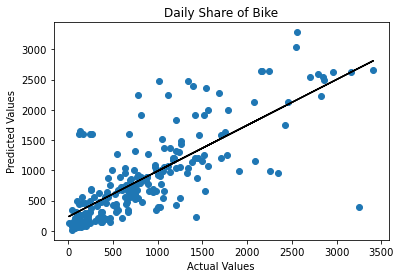

In [11]:
pred=model.predict(x_test)
mse=mean_squared_error(y_test,pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,pred)
print('RMS:',mse,'\n\nRMSE:',rmse,'\n\nR2:',r2,'\n\n')

#plot predicted vs actual
plt.scatter(y_test,pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Daily Share of Bike')

#plot the regression line
z=np.polyfit(y_test,pred,1)
p=np.poly1d(z)
slop,intercept=z
print('Slope:',slop,'\nIntercept:',intercept)
plt.plot(y_test,p(y_test),color='k')

####  Ensemble Algorithm

MSE: 80329.35588090909 

RMSE: 283.4243389000124 

R2: 0.8425193395584663 


Slope: 0.8003947860903894 
Intercept: 206.22789042505252


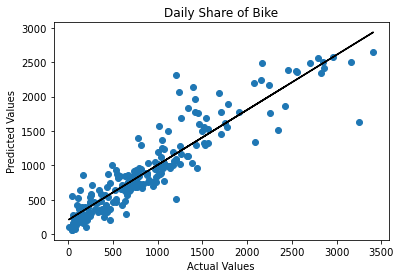

In [12]:
from sklearn.ensemble import RandomForestRegressor

#Train the model
model=RandomForestRegressor().fit(x_train,y_train)
model

#Evaluate the model using test data
pred=model.predict(x_test)
mse=mean_squared_error(y_test,pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,pred)
print('MSE:',mse,'\n\nRMSE:',rmse,'\n\nR2:',r2,'\n\n')

#plot the Predicted values vs Actual values
plt.scatter(y_test,pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Daily Share of Bike')

#plot the line of regresion
z=np.polyfit(y_test,pred,1)
slop,intercept=z
print('Slope:',slop,'\nIntercept:',intercept)
p=np.poly1d(z)
plt.plot(y_test,p(y_test),color='k');

####  Boosting Algorithm

RMS: 8296.126112849006 

RMSE: 91.08307259227153 

R2: 0.9837359654508544 




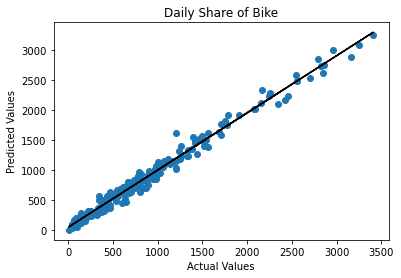

In [13]:
from sklearn.ensemble import GradientBoostingRegressor

#model
model=GradientBoostingRegressor().fit(x_test,y_test)

#predict
pred=model.predict(x_test)

#how well the model is 
mse=mean_squared_error(y_test,pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,pred)
print('RMS:',mse,'\n\nRMSE:',rmse,'\n\nR2:',r2,'\n\n')

#plot the scatter
plt.scatter(y_test,pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Daily Share of Bike')

#plot the line of regresion
z=np.polyfit(y_test,pred,1)
slop,intercept=z
p=np.poly1d(z)
plt.plot(y_test,p(y_test),color='k')